<h3> Gradient Descent

https://juliateachingctu.github.io/Julia-for-Optimization-and-Learning/dev/lecture_08/gradients/

<h4> Problem </h4>

minimize  $\quad \textit{f(x)}\\$
subject to  $\quad x \in X$

<h5> Maximization </h4>

maximize  $\quad \textit{f(x)}\\$
subject to  $\quad x \in X\\$

equivalent to

-minimize  $\quad -\textit{f(x)}\\$
subject to  $\quad x \in X$

<h3> Gradients </h3>

<h4> Visualization of Gradients </h4>

Consider $f(x)=sin(x_1 + x_2) + cos(x_1)^2$ on domain [-3,1] x [-2,1]. 

Write a function $g(x)$ which computes the derivative of $f$ at a point $x$. Plot the contours of $f$ on the domain.

In [48]:
# Define the function f and its derivative g
f(x) = sin(x[1] + x[2]) + cos(x[1])^2
g(x) = [cos(x[1] + x[2]) - 2*cos(x[1])*sin(x[1]); 
        cos(x[1] + x[2])] # gradient of f (column vector)

# Overload the function f (can take two variables as well as column vectors).
f(x1, x2) = f([x1; x2])
g(x1, x2) = g([x1; x2])
print("\nValue of (1,2) in f: ", f(1, 2))
print("\nValue of (1,2) in g: ", g([1; 2]))


Value of (1,2) in f: 0.43304658978629607
Value of (1,2) in g: [-1.8992899234261271, -0.9899924966004454]

In [105]:
using LinearAlgebra

# From copilot. 
# Define the optimization function
function optimize(f, g, x0, tol=1e-6, maxiter=1000)
    x = x0
    steps = [x0]
    for i in 1:maxiter
        x_new = x - 0.01*g(x) # step size 0.01
        push!(steps, x_new)
        if norm(x_new - x) < tol
            return (f(x_new), x_new, steps)
        end
        x = x_new
    end
    error("Did not converge in $maxiter iterations")
end
# Define the initial point x0
x0 = [0.0, 0.0]
# Call the optimization function
res = optimize(f, g, x0, 1e-4)
# Print the result
println("The minimum value is $(res[1]) at $(res[2])")

The minimum value is -0.9999165641811503 at [-1.5643372607057577, -0.015593304352775221]


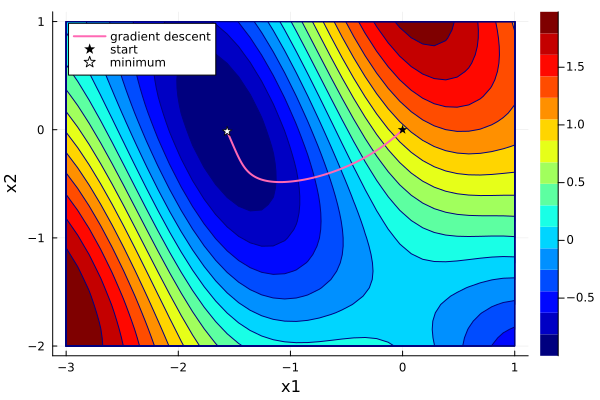

In [138]:
using Plots

xs = range(-3, 1, length = 40)
ys = range(-2, 1, length = 40)
contourf(xs, ys, f, color = :jet, plot = res[2])
xlabel!("x1")
ylabel!("x2")
plot!(Tuple.(res[3]), color = :hotpink, label = "gradient descent", linewidth = 2)
scatter!([x0[1]], [x0[2]], label = "start", color = :black, markersize = 5, markershape = :star)
scatter!([res[2][1]], [res[2][2]], label = "minimum", color = :white, markersize = 5, markershape = :star)